<a href="https://colab.research.google.com/github/antonela24/-proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt:  armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible values for columns
materias = ['Matemática', 'Lengua', 'Historia', 'Geografía', 'Ciencias Naturales', 'Física', 'Química', 'Biología', 'Educación Física', 'Inglés', 'Arte', 'Música']
apellidos = ['Gómez', 'Rodríguez', 'Pérez', 'García', 'López', 'Martínez', 'Sánchez', 'González', 'Fernández', 'Torres', 'Díaz']
nombres = ['Juan', 'Ana', 'Pedro', 'María', 'Luis', 'Laura', 'Carlos', 'Sofía', 'José', 'Isabel']

# Create an empty list to store data
data = []

# Generate data for 100 rows
for i in range(100):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota1 = random.randint(1,10)
  nota2 = random.randint(1,10)
  nota3 = random.randint(1,10)
  faltas = random.randint(0,20)
  data.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])

# Create the DataFrame
df = pd.DataFrame(data, columns=['Apellido', 'Nombre', 'Nro_DNI', 'Materia Escolar', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Display the DataFrame
df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Torres,Juan,63162378,Matemática,9,3,7,20
1,López,María,83777213,Inglés,3,5,6,5
2,Pérez,María,71441381,Física,8,1,1,17
3,González,Isabel,39464938,Educación Física,10,1,8,11
4,Rodríguez,Carlos,95146426,Lengua,10,4,6,10
...,...,...,...,...,...,...,...,...
95,Martínez,Laura,50060117,Física,7,8,6,3
96,González,María,24219092,Biología,7,4,9,14
97,Torres,Isabel,70862707,Ciencias Naturales,1,2,1,2
98,Gómez,Ana,14057864,Educación Física,3,4,1,10


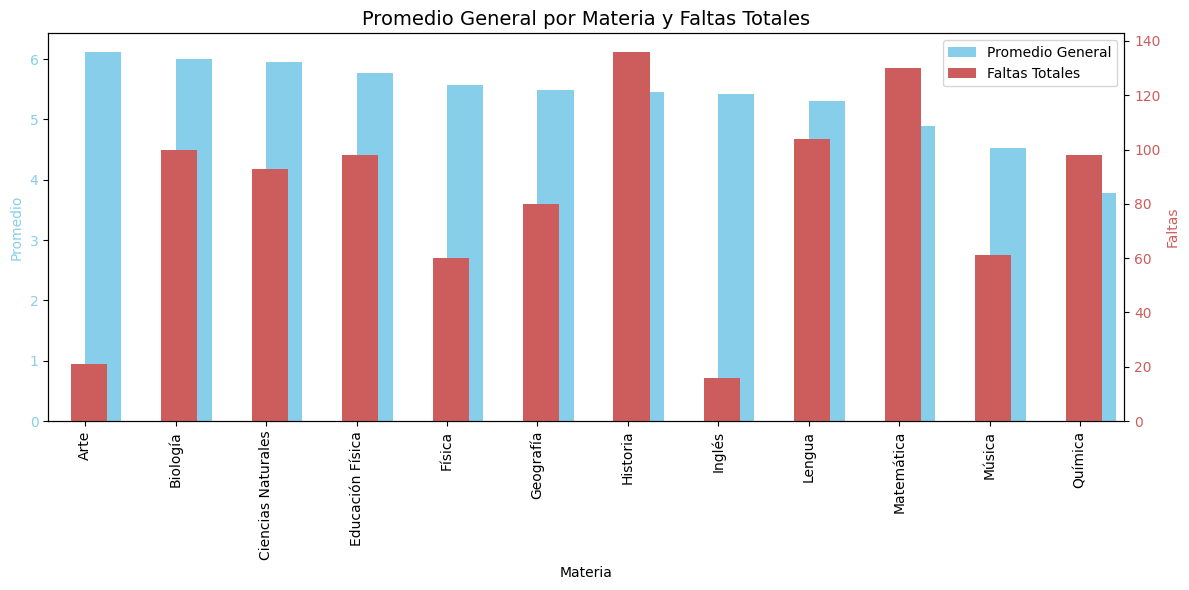

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Sort subjects by average grade in descending order
average_grades = average_grades.sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia Escolar')['Faltas a clases'].sum()


# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
average_grades.plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4, label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for absences
ax2 = ax1.twinx()

# Plot total absences
total_absences.plot(kind='bar', ax=ax2, color='indianred', position=0.4, width=0.4, label='Faltas Totales')
ax2.set_ylabel('Faltas', color='indianred')
ax2.tick_params(axis='y', labelcolor='indianred')

# Customize the chart
plt.title('Promedio General por Materia y Faltas Totales', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

In [4]:
df.to_csv("datos_alumnos.csv", index=False)
